<a href="https://colab.research.google.com/github/ainejerry/wine_repo/blob/main/PROJECT_2_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#load the data set
fpath = '/content/drive/MyDrive/CodingDojo/week 7/wines_SPA.csv'
df = pd.read_csv(fpath)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


First choice: dataset 1
1. Source of data

kaggle
2. Brief description of data

Data about wine produced by wineries around spain

3. What is the target?

price

4. What does one row represent? (A person? A business? An event? A product?)

a business

5. Is this a classification or regression problem?

regression

6. How many features does the data have?

11

7. How many rows are in the dataset?

7500

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

cleaning the data to remove unncessary characters might be one of the tasks

modelling the data around the categorical features might be a problem


In [5]:
#1) Check for class balance with value_counts
x=df.select_dtypes('object').columns
for y in x:
  print(df[y].value_counts())


Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64
Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64
2011    1190
2016     897
2015     860
201

In [6]:
# Get the number of null values for all columns and save as a variable
null_vals=df.isnull().sum()
print(null_vals)

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


In [7]:
# Drop the country column as it has low cardinality.
df.drop('country',axis=1,inplace=True)

In [8]:
#to confirm the change
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [9]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

5452

In [10]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows (including the first).
duplicated_rows_all=df.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

5503

In [11]:
# Drop duplicates (but keep the first!)
df.drop_duplicates()
# Obtain the sum of duplicated to confirm all have been dropped
df.duplicated().sum()


5452

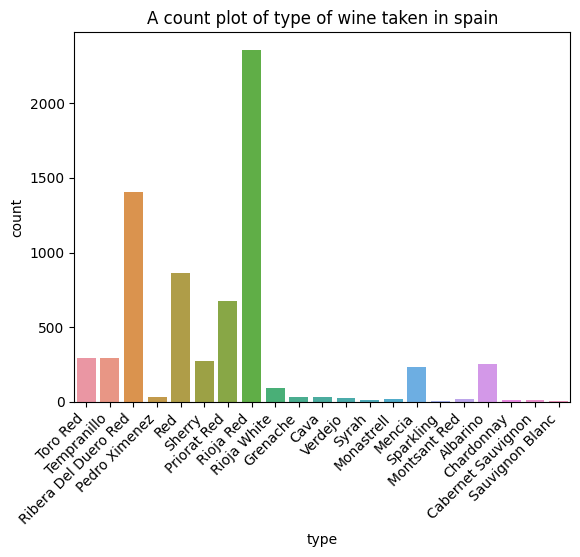

In [12]:
ax = sns.countplot(data=df, x='type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_title('A count plot of type of wine taken in spain');
#count plot showing rioja red wine as the most consumed in spain

In [13]:
#Heatmap to view the correlation between features.
df_correlation=df.corr(numeric_only=True)
df_correlation


,rating,num_reviews,price,body,acidity
rating,1.000000,0.015229,0.544809,0.163033,-0.094553
num_reviews,0.015229,1.000000,-0.030083,0.067106,0.040138
price,0.544809,-0.030083,1.000000,0.153624,-0.032870
body,0.163033,0.067106,0.153624,1.000000,-0.017950
acidity,-0.094553,0.040138,-0.032870,-0.017950,1.000000


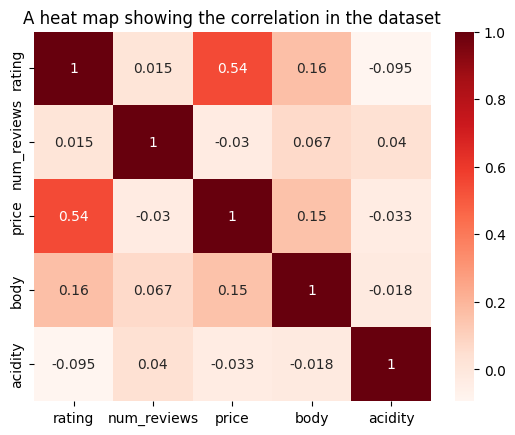

In [14]:
#heat map showing correlation of numerical features
ax=sns.heatmap(df_correlation , cmap ='Reds',annot=True);
ax.set_title('A heat map showing the correlation in the dataset');

<Axes: >

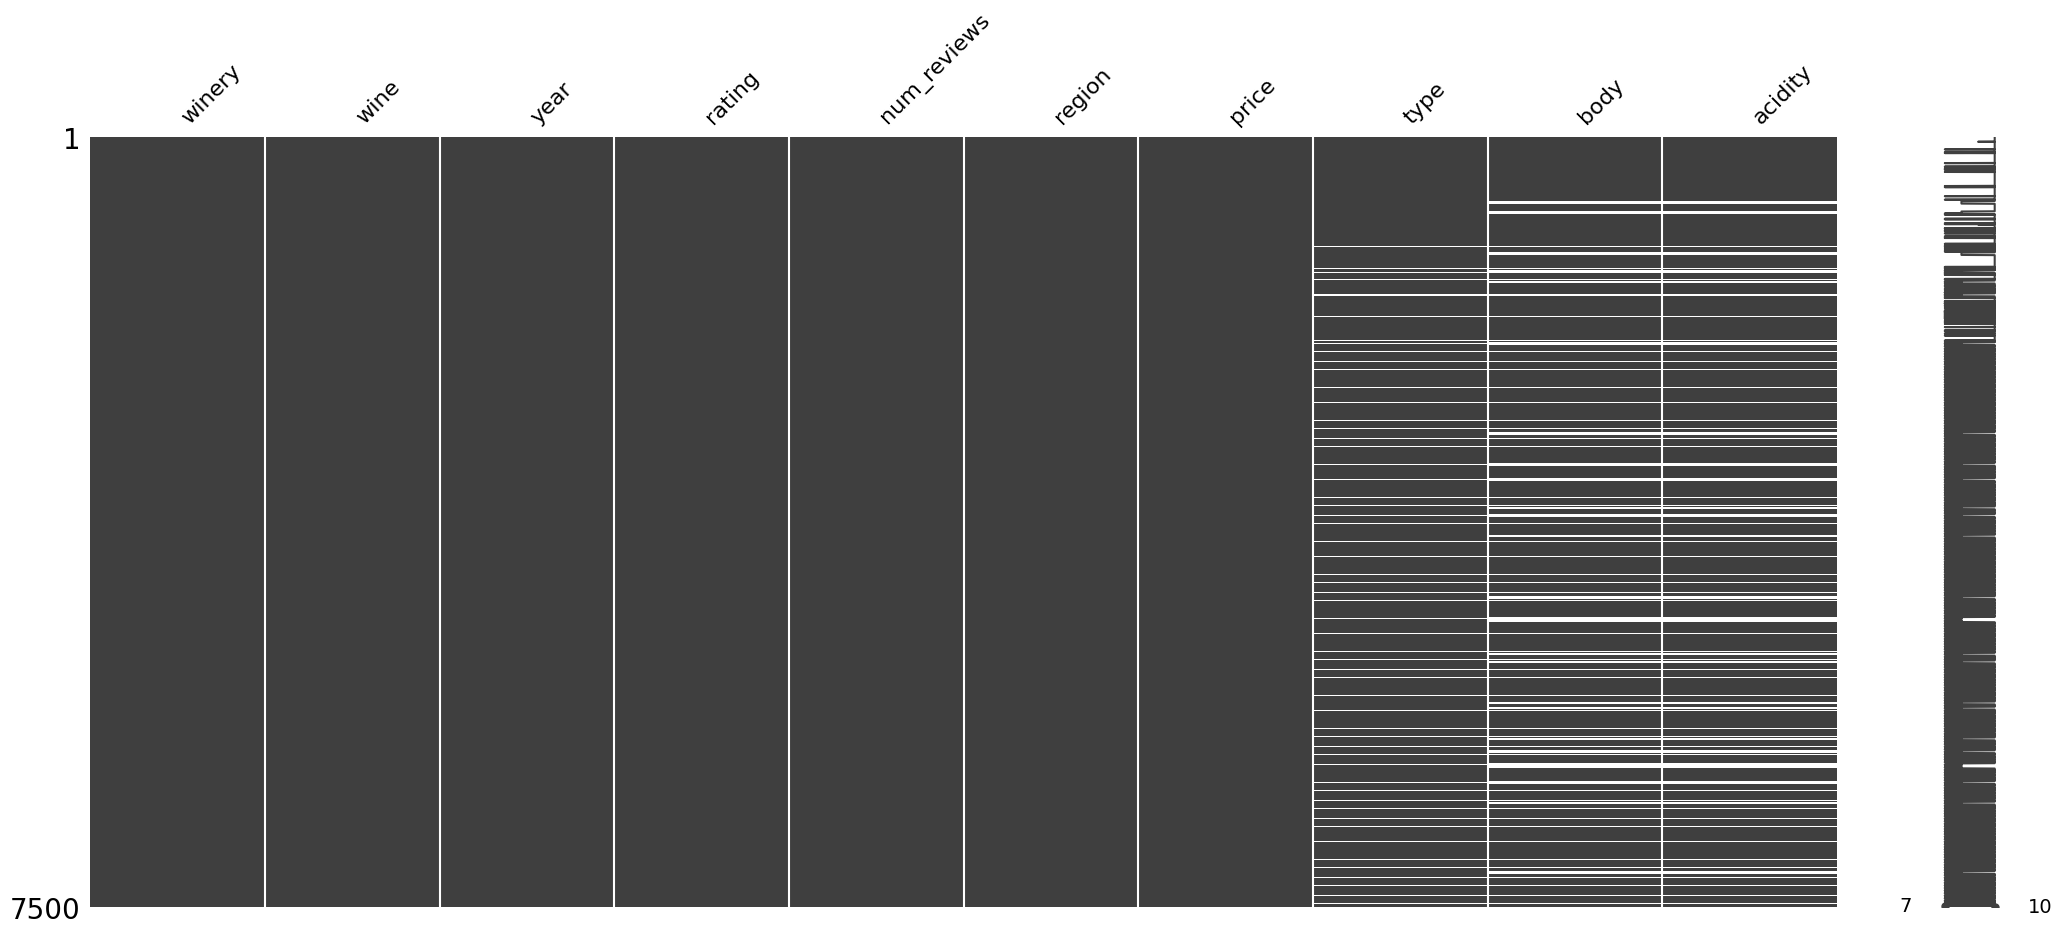

In [15]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df)

In [16]:
# save list of categorical column name
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['winery', 'wine', 'year', 'region', 'type']

In [17]:
# use the list of cat columns to fill null values with MISSING
for c in categorical_cols:
  df[c] = df[c].fillna('MISSING')

In [18]:
# save list of numeric column names
n_cols=df.select_dtypes(include=['int','float']).columns.tolist()
n_cols

['rating', 'num_reviews', 'price', 'body', 'acidity']

In [19]:
# use the list of num columns to fill null values with -1
for n in n_cols:
  df[n] = df[n].fillna(-1)

In [20]:
# Confirm no more nulls using Pandas
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

<Axes: >

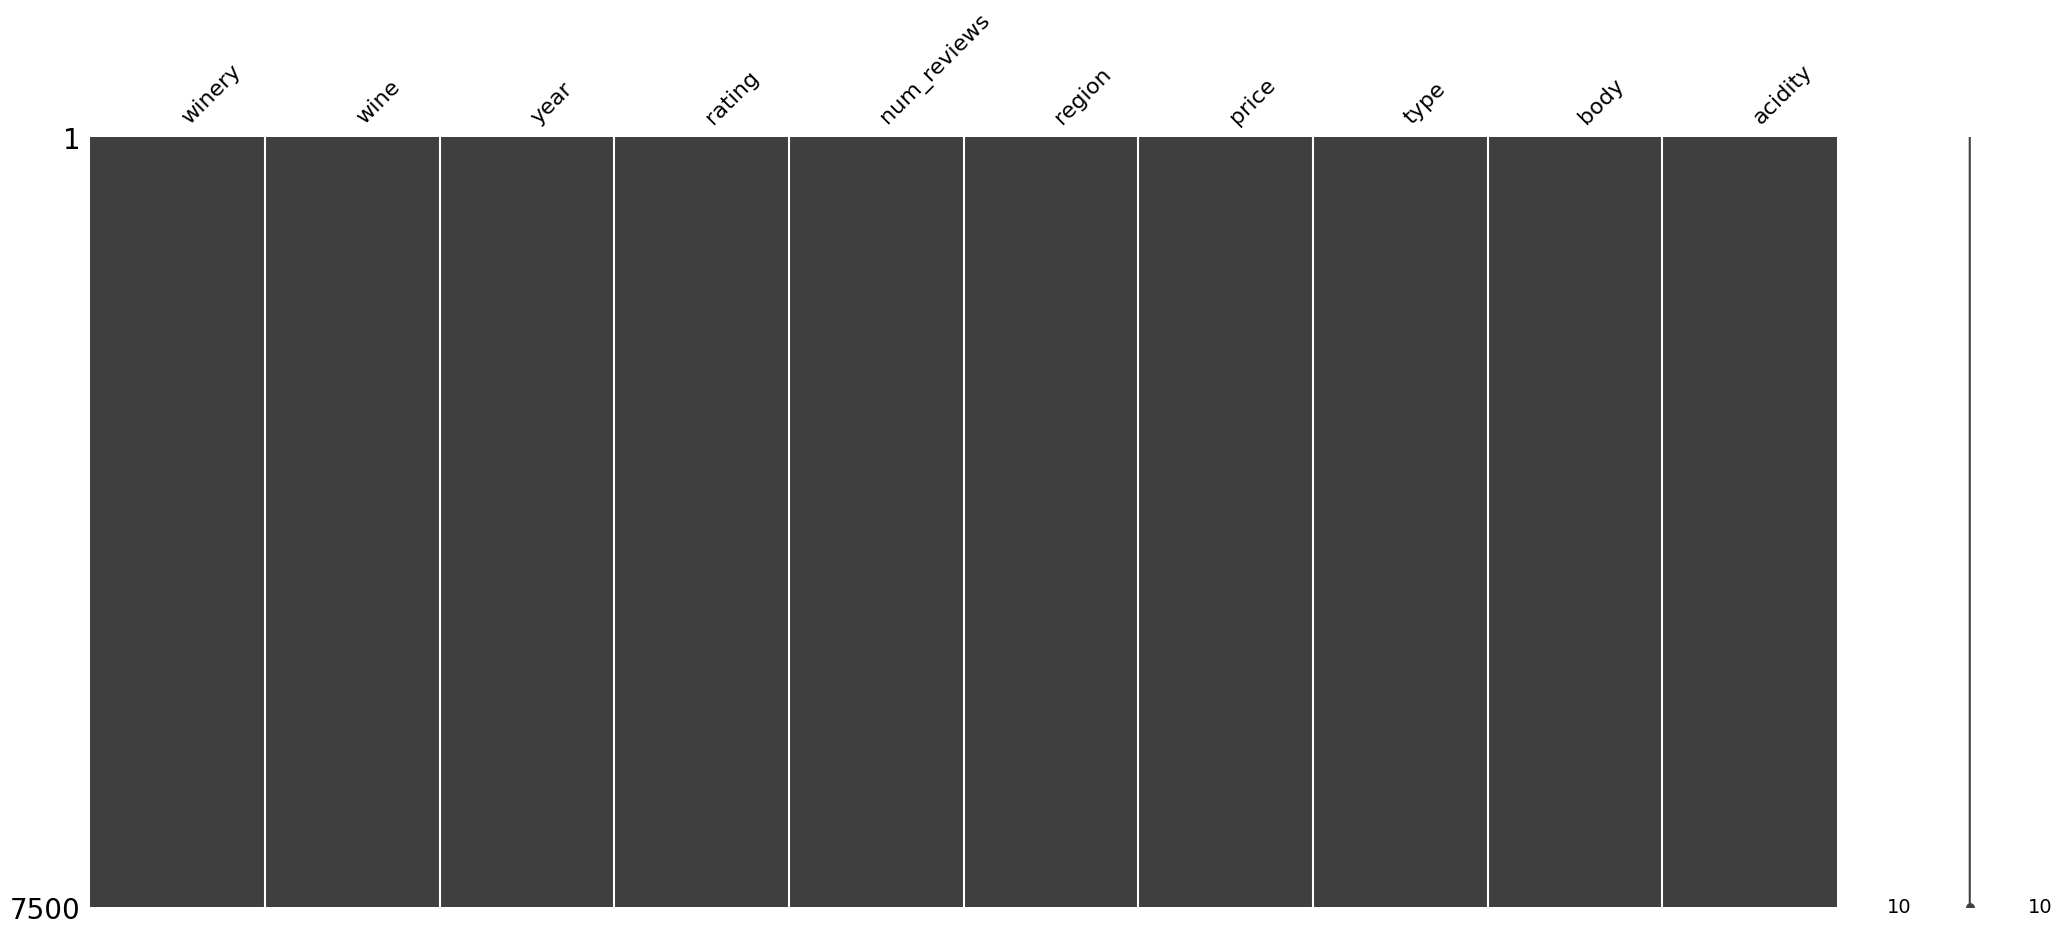

In [21]:
# Confirm no more nulls using using missingno
msno.matrix(df)